# Model Training

In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings




In [5]:
df = pd.read_csv(r'data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
y = df['math_score']
X = df.drop(['math_score'], axis=1)
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [12]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [15]:
# Create column transformer
num_features = X.select_dtypes(exclude='object').columns 
cat_features = X.select_dtypes(include='object').columns 

numeric_transformer = StandardScaler()
OHE_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",OHE_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ]
)

In [16]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [17]:
X_train_transformed

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.03079054,  0.43405338],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.9302895 ,  0.96470125],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.34544287,  1.1636942 ],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -0.52274728, -1.02522827],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -1.49143847, -1.02522827],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.48382733,  1.36268716]])

In [18]:
X_test_transformed

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.13786619,  1.03103224],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.24597837,  0.30139141],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         0.23836723,  0.23506043],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.79190505,  0.50038436],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.51513614,  0.36772239],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.30755945,  0.23506043]])

In [19]:
X_train_transformed.shape

(800, 19)

In [20]:
# Evaluation function to give all metrics after model training

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r_squared = r2_score(true,predicted)
    return mae,rmse, r_squared

In [24]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []
mae_list = []
rmse_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]

    model.fit(X_train_transformed , y_train)

    y_train_predicted = model.predict(X_train_transformed)
    y_test_predicted = model.predict(X_test_transformed)


    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_predicted)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_predicted)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    mae_list.append(model_test_mae)
    rmse_list.append(model_test_rmse)
    
    print('='*35)
    print('\n')

LinearRegression
Model performance for Training set
- Root Mean Squared Error: 5.3244
- Mean Absolute Error: 4.2678
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3967
- Mean Absolute Error: 4.2173
- R2 Score: 0.8803


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5925
- Mean Absolute Error: 5.2053
- R2 Score: 0.8072
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5173
- Mean Absolute Error: 5.1557
- R2 Score: 0.8254


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.6974
- Mean Absolute Error: 4.5042
- R2 Score: 0.8560
------------------------

In [31]:
pd.DataFrame(list(zip(model_list,r2_list,rmse_list,mae_list)), columns = ['Model name','R2_score', 'RMSE','MAE']).sort_values(by=['R2_score'], ascending = False)

,Model name,R2_score,RMSE,MAE
2,Ridge,0.880592,5.390418,4.211113
0,LinearRegression,0.880315,5.396666,4.217325
8,AdaBoost Regressor,0.853678,5.967059,4.695577
5,Random Forest Regressor,0.852684,5.987282,4.649808
7,CatBoosting Regressor,0.851831,6.004608,4.608758
6,XGBoost Regressor,0.827797,6.473307,5.057731
1,Lasso,0.825446,6.517347,5.155720
3,K-Neighbors Regressor,0.785944,7.217202,5.588000
4,Decision Tree,0.741903,7.924961,6.185000


## Linear Regression

In [32]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train_transformed, y_train)
y_pred = lin_model.predict(X_test_transformed)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.03


Plot of y_pred and y_test

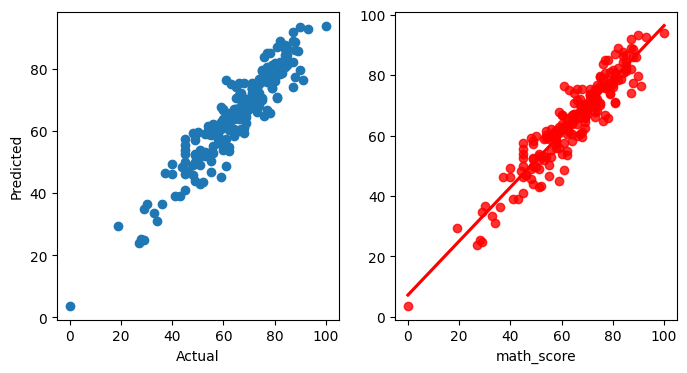

In [39]:
plt.subplots(1,2,figsize=(8,4))
plt.subplot(121)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.subplot(122)
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [40]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.522705,14.477295
737,53,58.951172,-5.951172
740,80,76.921143,3.078857
660,74,76.796143,-2.796143
411,84,87.608154,-3.608154
...,...,...,...
408,52,43.453125,8.546875
332,62,62.070801,-0.070801
208,74,67.997314,6.002686
613,65,67.134033,-2.134033
